In [1]:
#Importation des modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Importation de la base de données
df = pd.read_csv("customer_churn_prediction_dataset.csv", decimal=".", sep=",")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0296-XXXX,Female,1,No,Yes,61,No,Yes,DSL,No,...,Yes,No internet service,No,No,One year,Yes,Electronic check,42.52,2593.72,No
296,0297-XXXX,Female,0,No,No,49,Yes,No phone service,DSL,No internet service,...,Yes,No internet service,Yes,Yes,Month-to-month,Yes,Mailed check,22.31,1093.19,Yes
297,0298-XXXX,Male,0,No,Yes,71,Yes,Yes,DSL,No internet service,...,Yes,Yes,No,Yes,Two year,No,Mailed check,59.57,4229.47,Yes
298,0299-XXXX,Male,1,Yes,Yes,1,Yes,Yes,No,Yes,...,No internet service,No internet service,Yes,Yes,Two year,No,Credit card,31.32,31.32,No


In [3]:
#Prise de connaissance des variables et vérification des données vides
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBilling  300 non-null    object 
 1

In [4]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

## 2. Statistiques descriptives

### 2.1. Variables numériques

In [5]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,300.000000,300.000000,300.000000
mean,35.783333,67.226800,2477.975767
std,21.113400,28.638073,1918.540111
min,1.000000,18.450000,30.030000
25%,17.000000,42.337500,910.302500
50%,36.000000,68.635000,2072.400000
75%,53.250000,92.430000,3618.405000
max,72.000000,118.640000,8318.880000


### 2.2. Variables non-numériques

In [6]:
df.describe(include = 'object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
unique,300,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,0001-XXXX,Male,1,Yes,Yes,Yes,No,Fiber optic,No,No,Yes,No internet service,No,No internet service,Month-to-month,Yes,Electronic check,No
freq,1,151,163,155,158,156,105,105,107,109,110,103,118,107,111,164,77,161


### 2.3 Distribution de la variable d'intérêt

In [7]:
df["Churn"].value_counts()

Churn
No     161
Yes    139
Name: count, dtype: int64

In [8]:
df.sort_values(by="Churn", ascending=False)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
187,0188-XXXX,Male,1,No,No,27,Yes,No phone service,Fiber optic,No internet service,...,No internet service,Yes,No internet service,No,Month-to-month,No,Bank transfer,61.81,1668.87,Yes
151,0152-XXXX,Male,1,Yes,Yes,35,No,No,No,Yes,...,Yes,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,97.92,3427.20,Yes
155,0156-XXXX,Female,0,No,Yes,62,Yes,No,Fiber optic,No internet service,...,No,Yes,No,No internet service,Month-to-month,No,Mailed check,81.41,5047.42,Yes
159,0160-XXXX,Female,0,Yes,No,40,No,No phone service,DSL,Yes,...,No internet service,No internet service,No,No internet service,Two year,No,Credit card,90.96,3638.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0063-XXXX,Male,0,Yes,No,64,Yes,No,No,No internet service,...,Yes,Yes,No,No internet service,One year,Yes,Bank transfer,36.91,2362.24,No
165,0166-XXXX,Male,0,Yes,Yes,38,No,No,No,Yes,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card,51.78,1967.64,No
169,0170-XXXX,Female,1,Yes,Yes,25,Yes,Yes,Fiber optic,No internet service,...,No internet service,No,No internet service,Yes,Month-to-month,No,Electronic check,104.17,2604.25,No
170,0171-XXXX,Female,0,Yes,Yes,17,Yes,Yes,Fiber optic,No internet service,...,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card,106.95,1818.15,No


#### Recodage de la variable 'Churn'

In [9]:
df['Churn']= df['Churn'].apply(lambda x: True if x== 'Yes' else False)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,True
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,True
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,True
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,False
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,True


#### Proportions

In [10]:
df['Churn'].value_counts(normalize=True)

Churn
False    0.536667
True     0.463333
Name: proportion, dtype: float64

On observe 46% de taux de résiliation
contre 53% de taux de fidélité.

Nous pouvons peut-être déterminer à partir des données, les raisons de ce taux de résiliation potentiellement élevé.  

In [11]:
df[df['Churn']==1]['tenure'].mean()

33.985611510791365

In [12]:
df[df['Churn']==1]['tenure'].max()

72

In [13]:
df[df['Churn']==1]['tenure'].min()

1

In [14]:
df[df['Churn']==0]['tenure'].max()

72

#### Distribution des services internet parmi les personnes ayant churné

In [15]:
df[df['Churn']==1]['InternetService'].value_counts()

InternetService
Fiber optic    52
No             44
DSL            43
Name: count, dtype: int64

D'une part, les personnes ayant résilié utilisent en majorité la connexion internet fournie par la Fibre optique. 
D'autre part l'autre majorité n'utilise pas de service internet.

In [16]:
df[df['Churn']==0]['InternetService'].value_counts()

InternetService
No             55
DSL            53
Fiber optic    53
Name: count, dtype: int64

Dune part, les personnes qui sont restées fidèles n'utilisent pas de service internet. D'autre par, elles exploitent le service internet DSL.


#### En conclusion, on pourrait soupçonner comme étant l'un des motifs de résiliation, la non convenance des services internet à la clientèle.
La charté peut être une raison, la qualité peut en être une également.







#### Distribution des services de streaming de films parmi les personnes ayant churné

In [17]:
df[df['Churn']==1]['StreamingMovies'].value_counts()

StreamingMovies
No internet service    50
No                     46
Yes                    43
Name: count, dtype: int64

Seulement le tiers des abonés ayant résilié souscrivent aux services de streaming des films.

In [18]:
df[df['Churn']==0]['StreamingMovies'].value_counts()

StreamingMovies
No internet service    57
Yes                    54
No                     50
Name: count, dtype: int64

En majorité, les abonés fidèles n'utilisent pas de service internet et donc ne peuvent souscrire au service de streaming des films. La minorité de cette distribution ne souscrit pas à ce service.
En résumé, les services de streaming intéressent environ le tiers des abonnés fidèles.

#### En conclusion, les services de streaming de films n'intéresse certainement qu'une infime partie de l'ensemble des abonnés. Ils ne sont certainement pas une raison de la résiliation des 46% d'abonnés.

In [19]:
df[df['Churn']==0]['tenure'].mean()

37.33540372670807

In [20]:
df[df['Churn']==1]['SeniorCitizen'].value_counts()

SeniorCitizen
1    71
0    68
Name: count, dtype: int64

In [21]:
df[df['Churn']==0]['SeniorCitizen'].value_counts()

SeniorCitizen
1    92
0    69
Name: count, dtype: int64

In [22]:
df[df['Churn']==0]['Contract'].value_counts()

Contract
Month-to-month    57
Two year          52
One year          52
Name: count, dtype: int64

In [23]:
df[df['Churn']==1]['Contract'].value_counts()

Contract
Month-to-month    54
One year          45
Two year          40
Name: count, dtype: int64

### Tableaux croisés

In [24]:
Colonne = ['tenure','MonthlyCharges','TotalCharges']
           
df.groupby(['Churn'])[Colonne].mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
False,37.335404,69.243478,2589.316398
True,33.985612,64.890935,2349.012878


In [25]:
df.groupby(['Churn'])[Colonne].describe()

tenure                                                     \
       count       mean        std  min   25%   50%   75%   max   
Churn                                                             
False  161.0  37.335404  20.648833  1.0  22.0  38.0  55.0  72.0   
True   139.0  33.985612  21.573933  1.0  14.5  33.0  52.0  72.0   

      MonthlyCharges             ...                TotalCharges               \
               count       mean  ...    75%     max        count         mean   
Churn                            ...                                            
False          161.0  69.243478  ...  93.46  118.47        161.0  2589.316398   
True           139.0  64.890935  ...  88.82  118.64        139.0  2349.012878   

                                                                 
               std    min       25%      50%       75%      max  
Churn                                                            
False  1832.163871  30.03  1029.820  2338.80  3623.400  8285.20  
True   2012.926516  39.80   762.925  1668.87  3520.545  8318.88  

[2 rows x 24 columns]

In [26]:
df.groupby(['Churn'])[Colonne].agg([np.mean,np.std,np.min,np.max])

C:\Users\HP\AppData\Local\Temp\ipykernel_8116\1277977442.py:1: FutureWarning: The provided callable <function mean at 0x0000021CA0A36700> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['Churn'])[Colonne].agg([np.mean,np.std,np.min,np.max])
C:\Users\HP\AppData\Local\Temp\ipykernel_8116\1277977442.py:1: FutureWarning: The provided callable <function std at 0x0000021CA0A36840> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby(['Churn'])[Colonne].agg([np.mean,np.std,np.min,np.max])
C:\Users\HP\AppData\Local\Temp\ipykernel_8116\1277977442.py:1: FutureWarning: The provided callable <function min at 0x0000021CA0A35E40> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used dire

tenure                    MonthlyCharges                            \
            mean        std min max           mean        std    min     max   
Churn                                                                          
False  37.335404  20.648833   1  72      69.243478  28.132707  18.45  118.47   
True   33.985612  21.573933   1  72      64.890935  29.139414  19.09  118.64   

      TotalCharges                               
              mean          std    min      max  
Churn                                            
False  2589.316398  1832.163871  30.03  8285.20  
True   2349.012878  2012.926516  39.80  8318.88

### 3. Visualisation de la donnée d'intérêt 'Churn'


In [27]:
import warnings

warnings.filterwarnings("ignore")

sns.set()

# Les graphiques au format Retina sont plus nets et lisibles
%config InlineBackend.figure_format = 'retina'

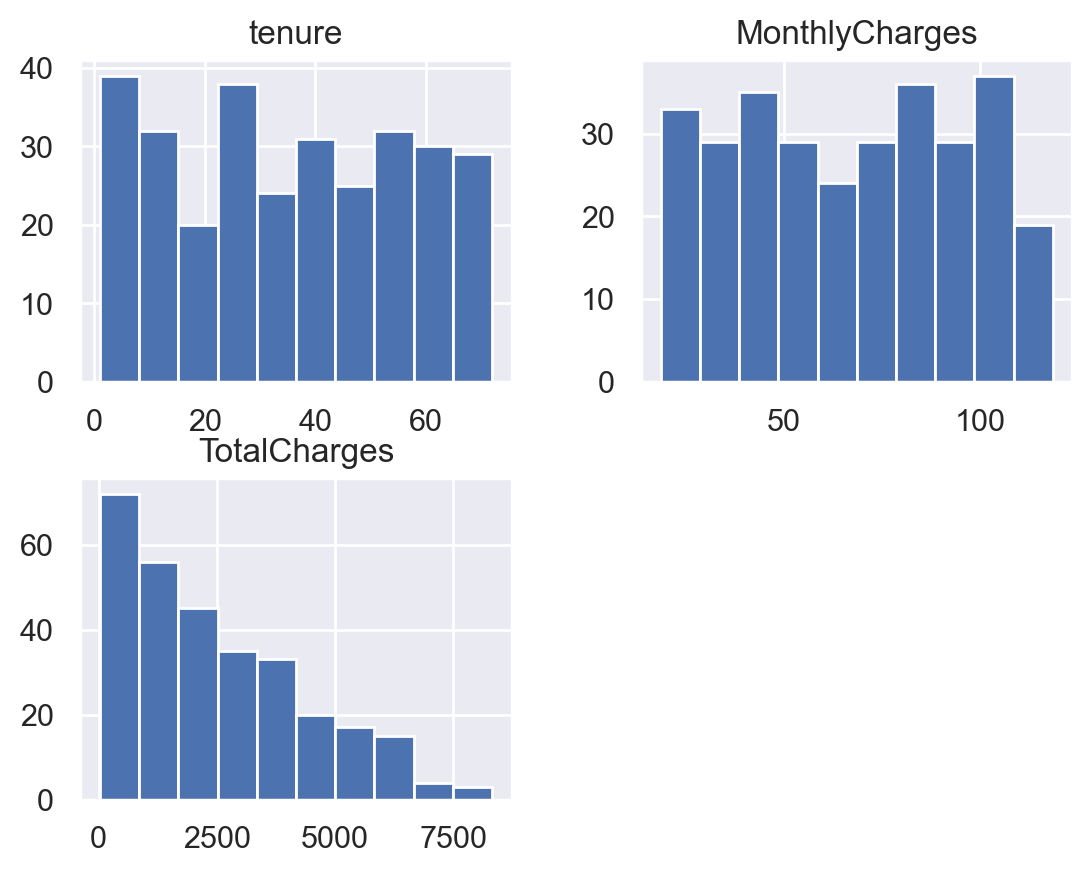

In [28]:
df.hist();

#### 3.1 Effectifs

<Axes: xlabel='Churn', ylabel='count'>

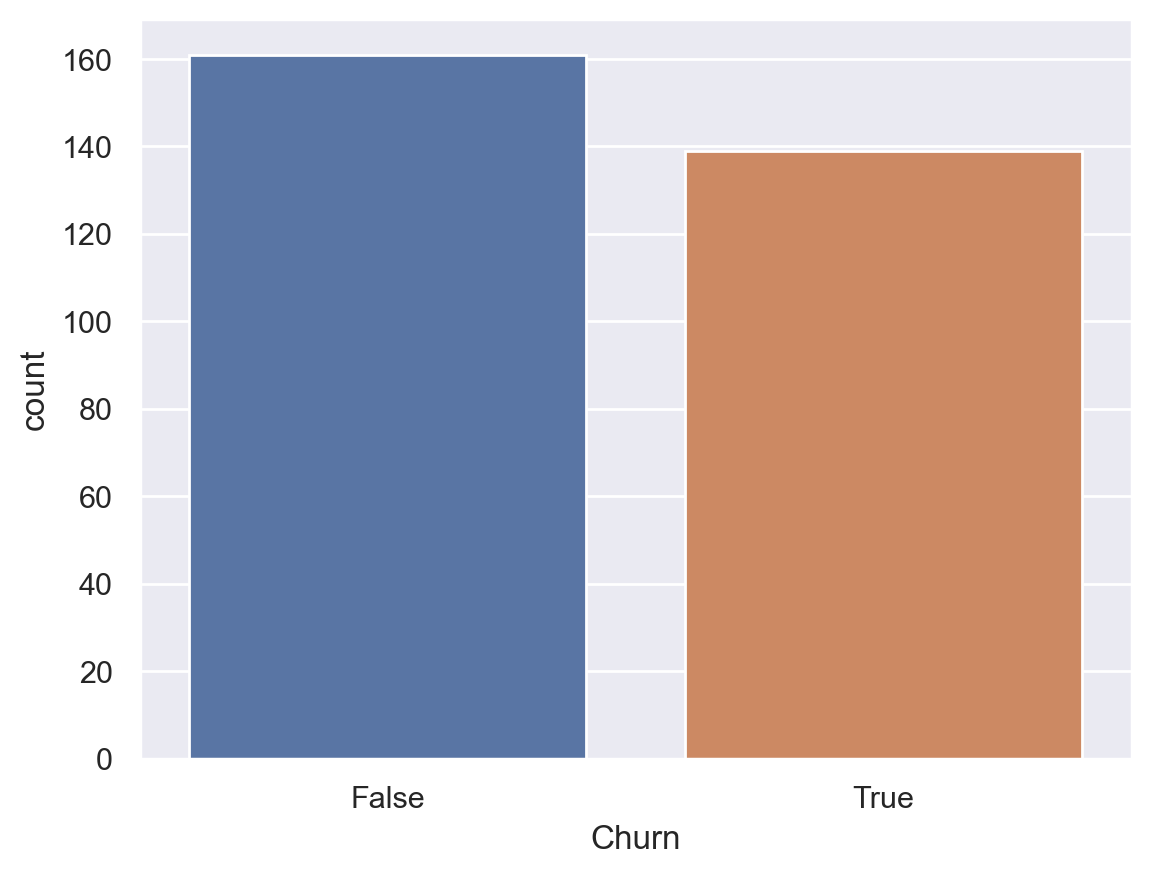

In [29]:
sns.countplot(x='Churn', data=df)

<Axes: xlabel='TotalCharges', ylabel='Density'>

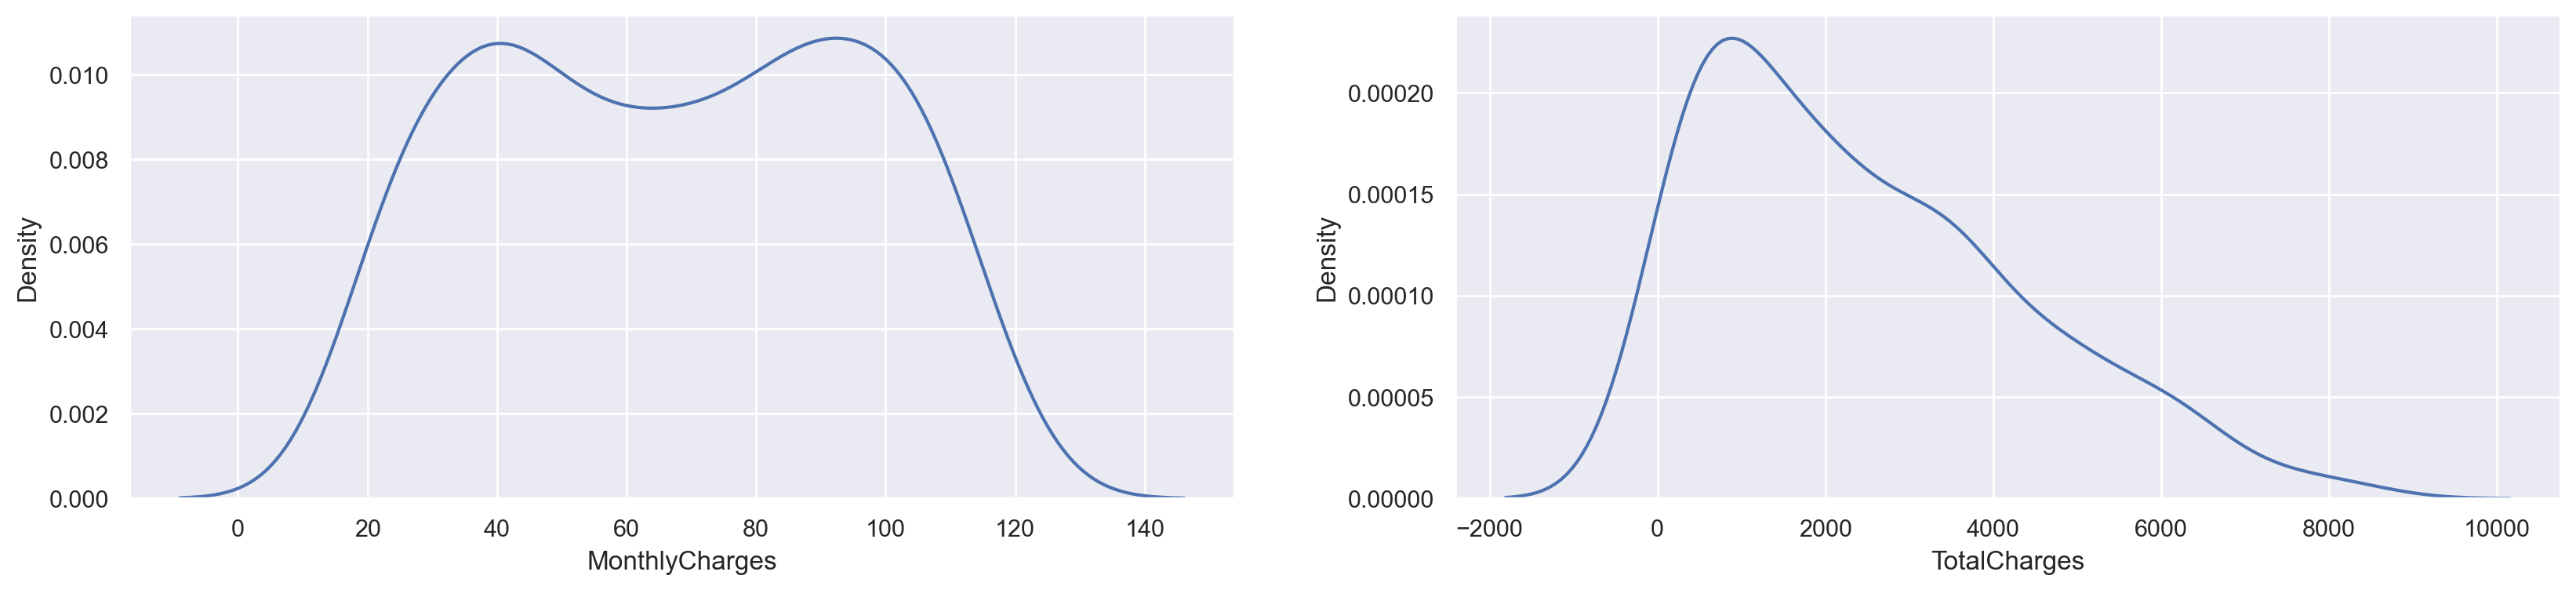

In [30]:
fig,axes = plt.subplots(1,2, figsize=(20,4))
sns.kdeplot(df["MonthlyCharges"], ax = axes[0])
sns.kdeplot(df["TotalCharges"], ax = axes[1])

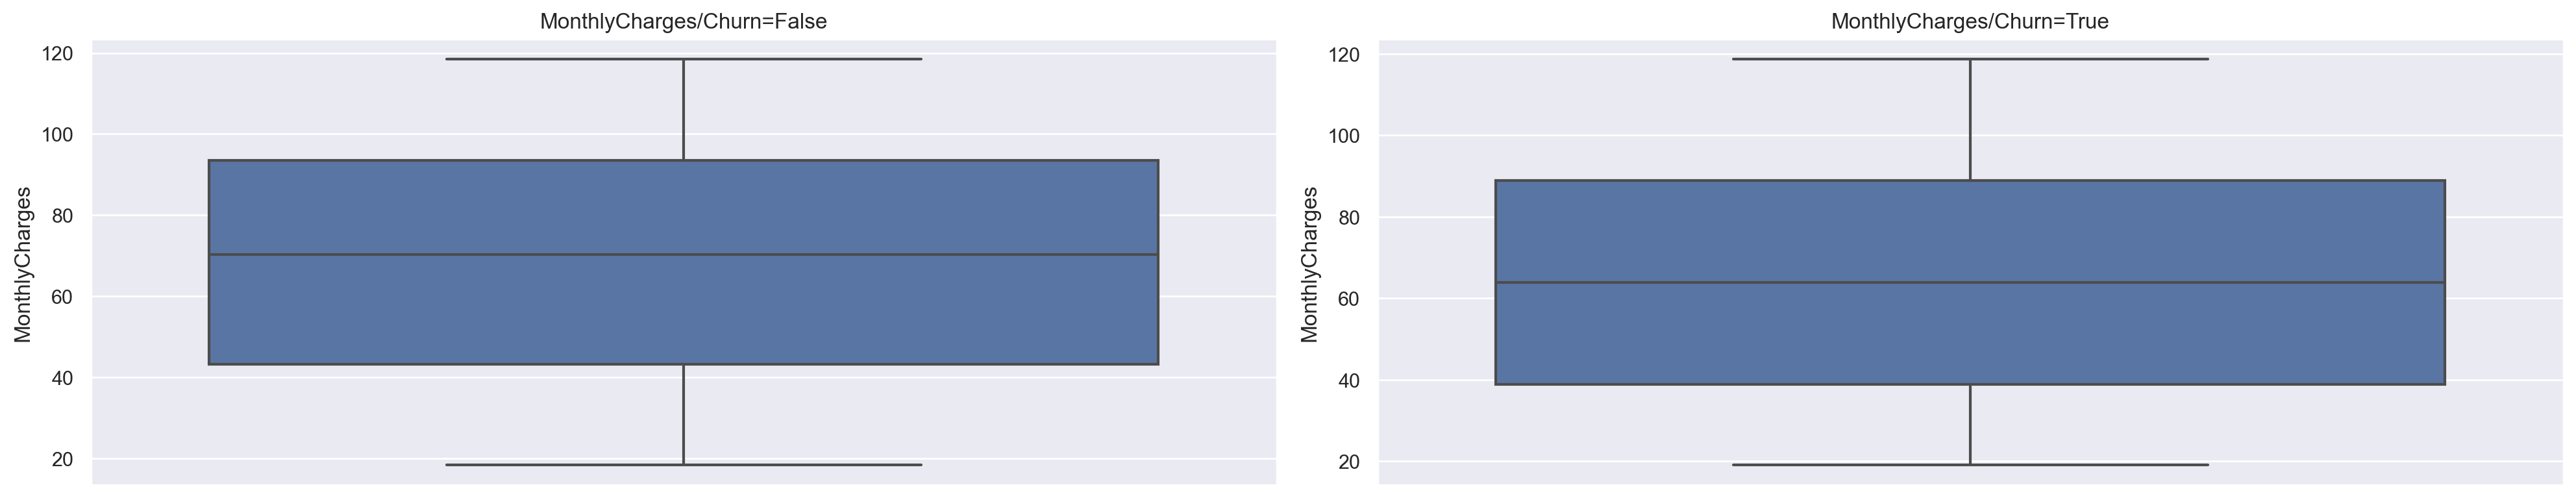

In [31]:
fig,axes = plt.subplots(1,2, figsize=(20,4))
sns.boxplot(y = df[df['Churn']==0]['MonthlyCharges'], ax= axes[0])
axes[0].set_title('MonthlyCharges/Churn=False')

sns.boxplot(y = df[df['Churn']==1]['MonthlyCharges'], ax= axes[1])
axes[1].set_title('MonthlyCharges/Churn=True')


plt.tight_layout()
plt.show()

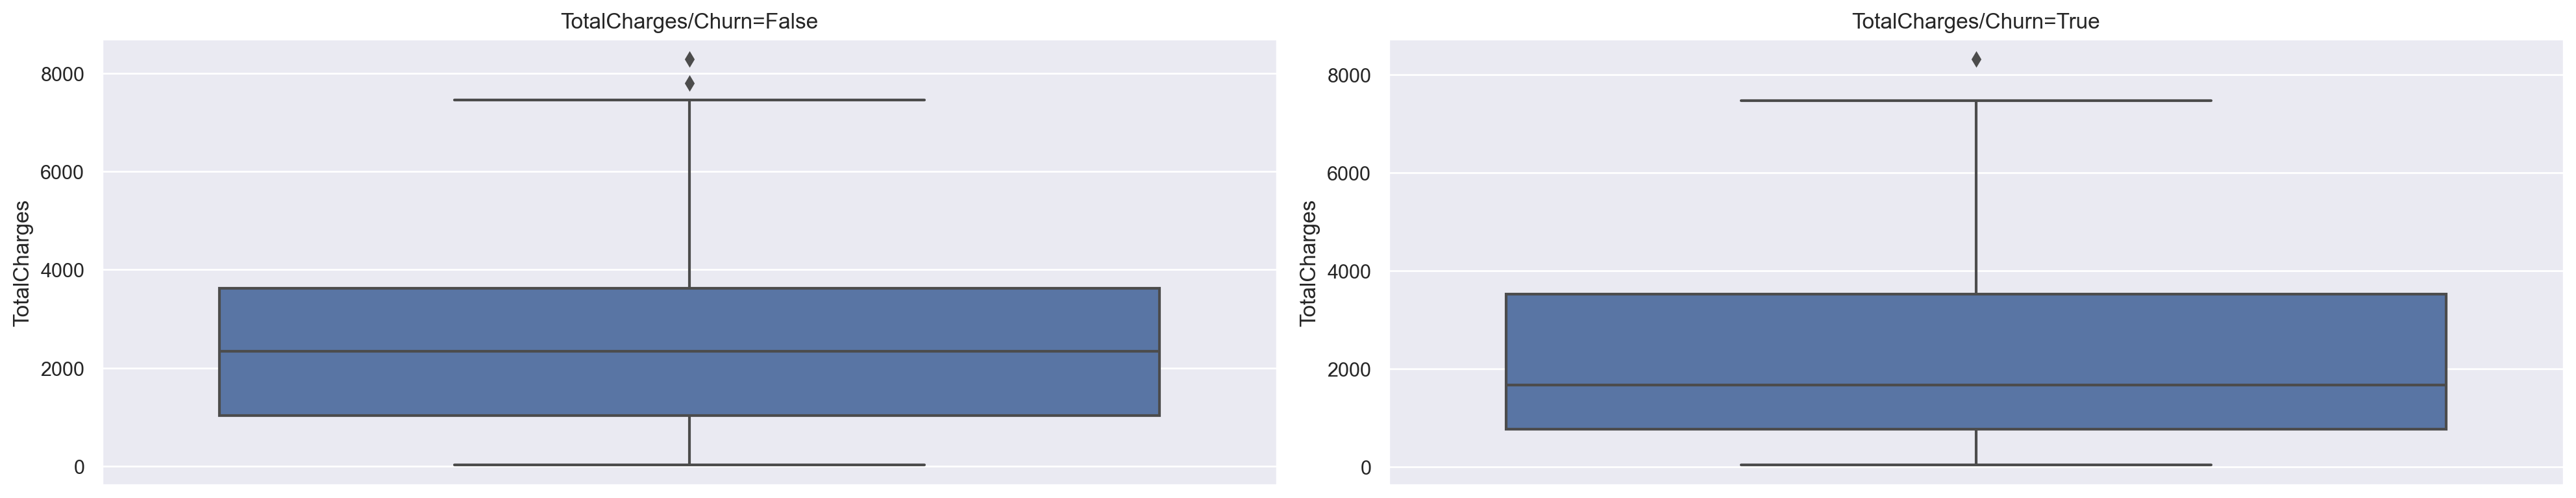

In [32]:
fig,axes = plt.subplots(1,2, figsize=(20,4))
sns.boxplot(y = df[df['Churn']==0]['TotalCharges'], ax= axes[0])
axes[0].set_title('TotalCharges/Churn=False')

sns.boxplot(y = df[df['Churn']==1]['TotalCharges'], ax= axes[1])
axes[1].set_title('TotalCharges/Churn=True')


plt.tight_layout()
plt.show()

### 4. Visualisation entre plusieurs variables quantitatives

### 4.1 -La Matrice de corrélation

Elle permet de connaître la nature des liaisons entre les variables quantitatives

Examinons les corrélations entre les variables numériques de notre ensemble de données.

In [33]:
#Création d'une liste contenant uniquement les variables quantitatives du tableau de données (I s'agit d'un set qui prive l'ensemble des valeur qualitatives)

numerical = set(df.columns) - {'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'}
print(numerical) 
#Transformation en liste

numerical = list(numerical)
numerical

{'TotalCharges', 'MonthlyCharges', 'Churn', 'tenure'}


['TotalCharges', 'MonthlyCharges', 'Churn', 'tenure']

### Calcul et représentation des corrélations

In [34]:
corr_matrix = df[numerical].corr()
corr_matrix

,TotalCharges,MonthlyCharges,Churn,tenure
TotalCharges,1.000000,0.602747,-0.062562,0.804488
MonthlyCharges,0.602747,1.000000,-0.075914,0.120101
Churn,-0.062562,-0.075914,1.000000,-0.079247
tenure,0.804488,0.120101,-0.079247,1.000000


<Axes: >

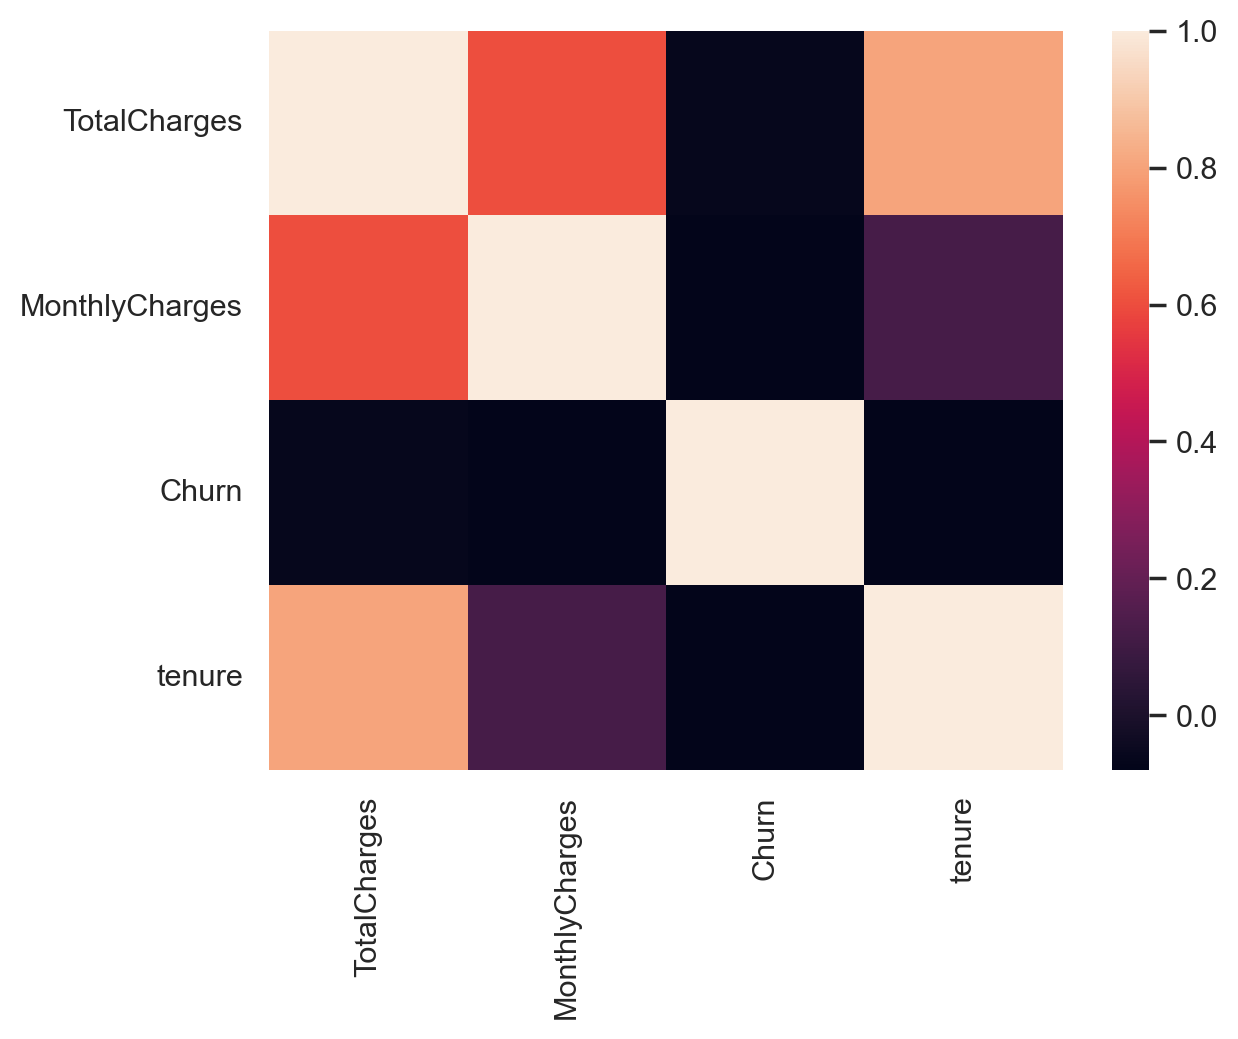

In [35]:
sns.heatmap(corr_matrix)

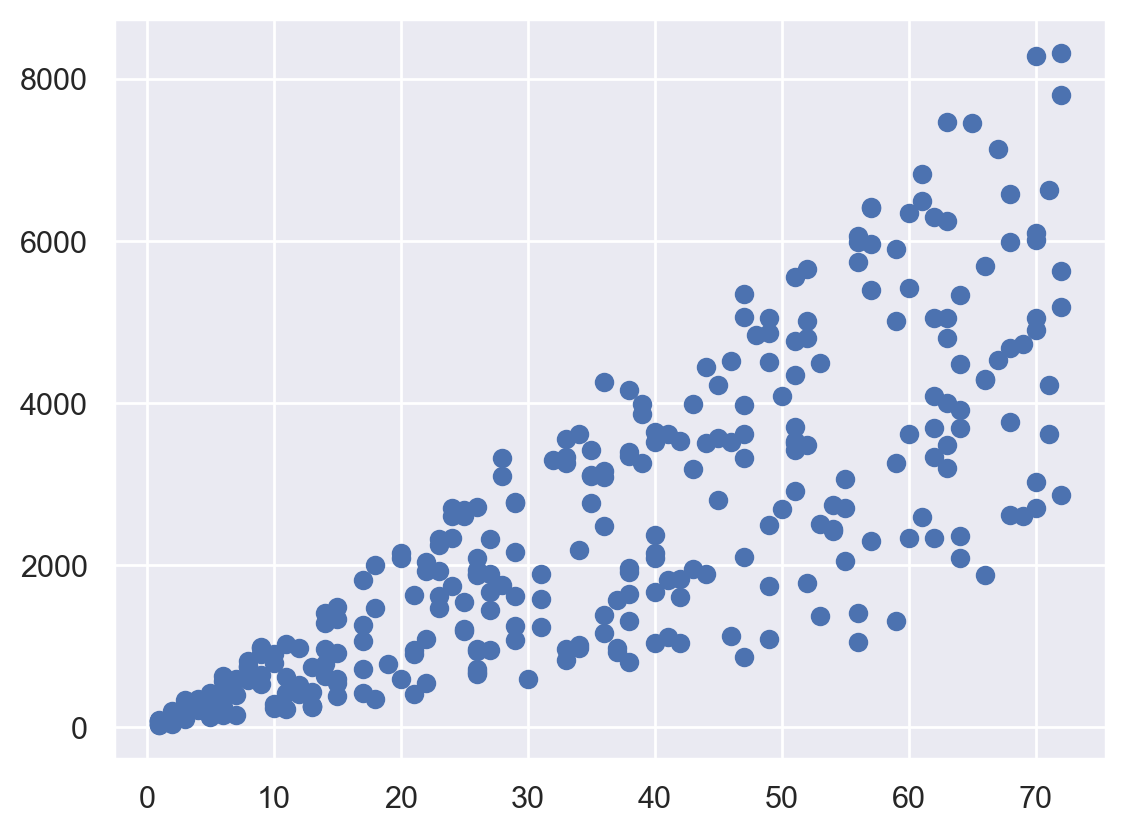

In [36]:
plt.scatter(df['tenure'], df['TotalCharges'])

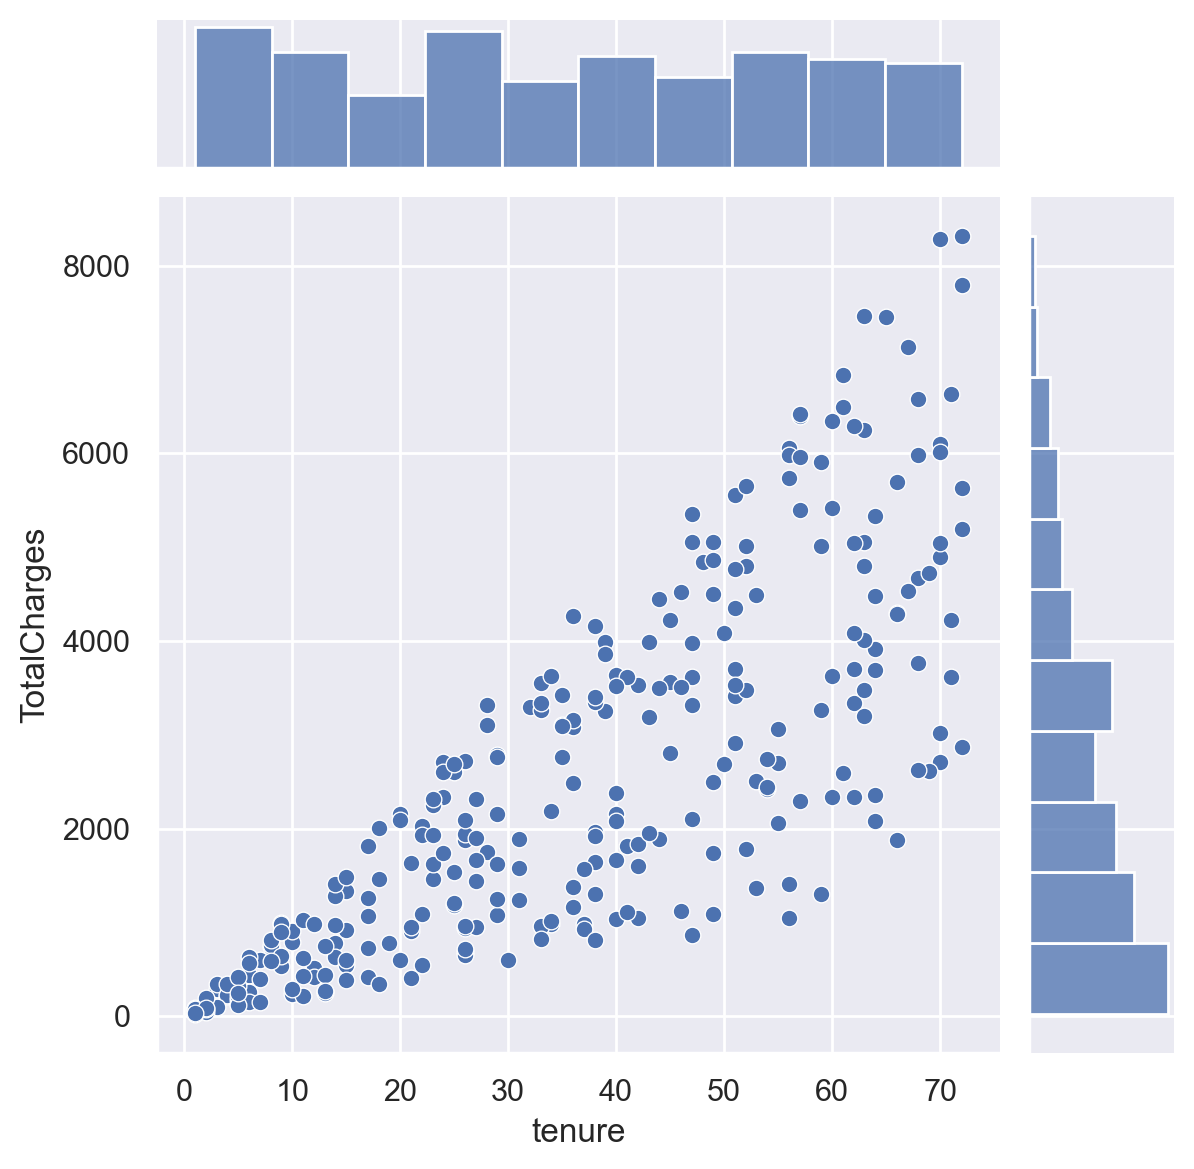

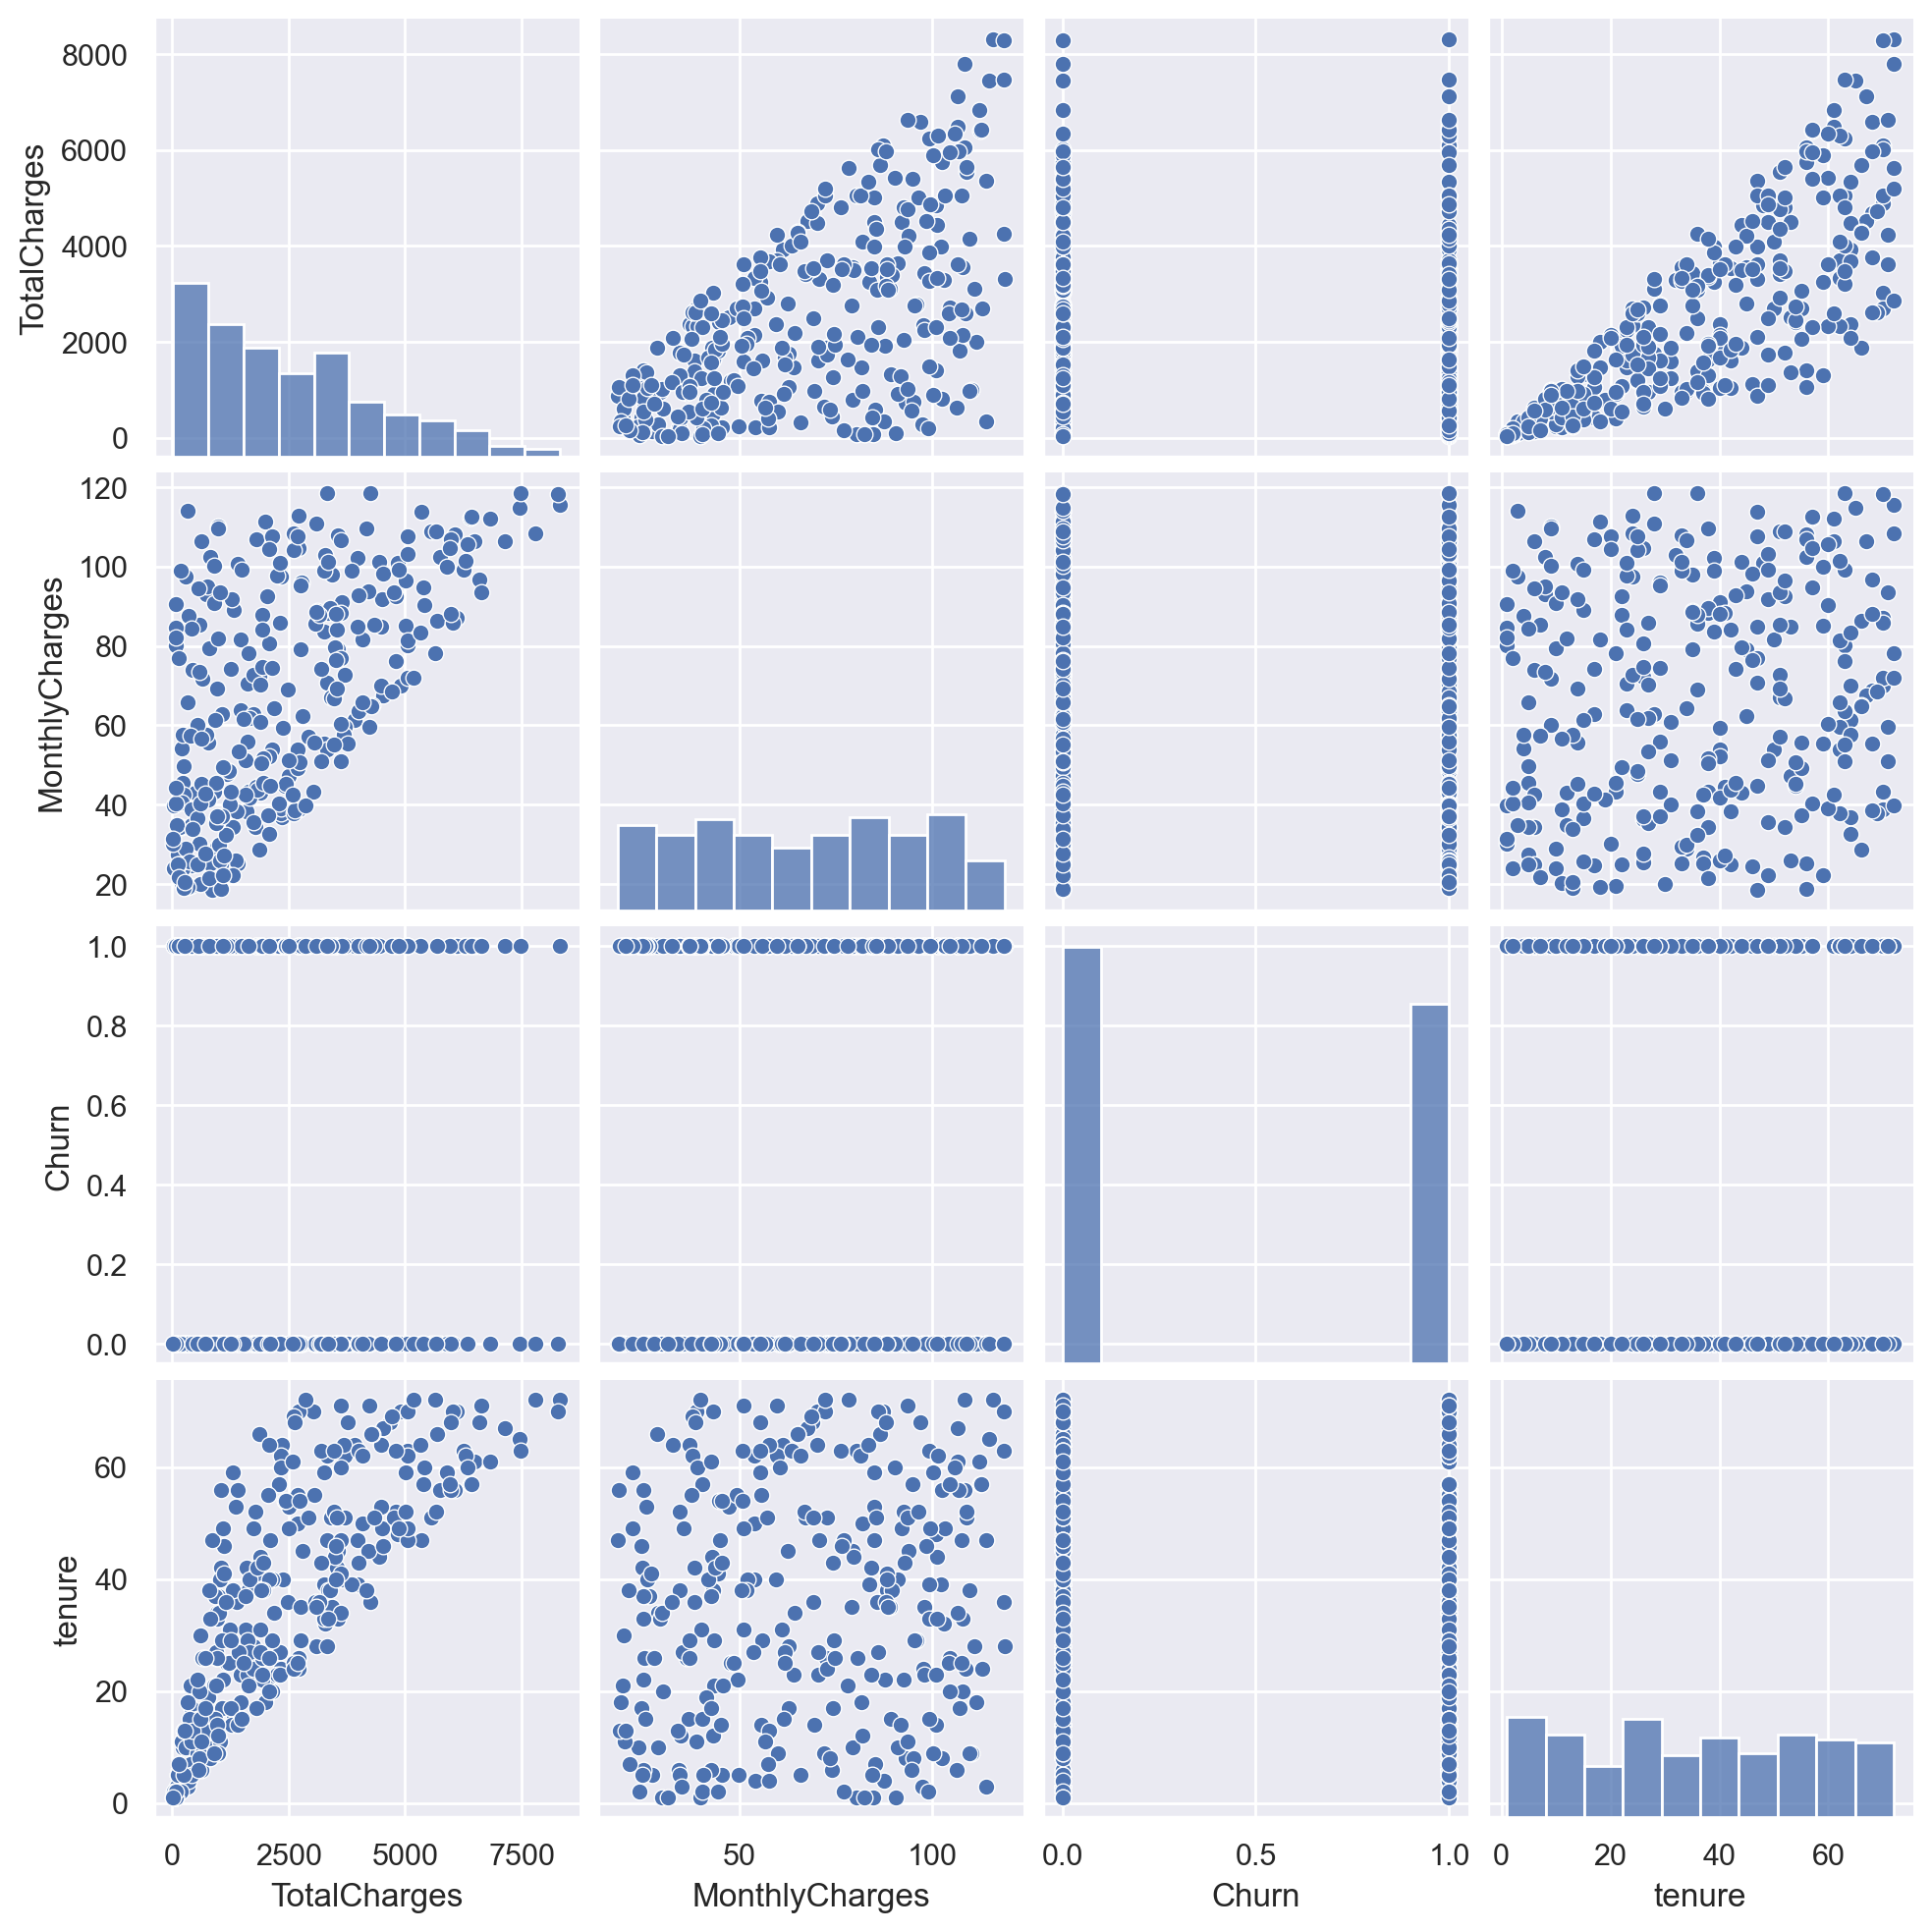

In [37]:
sns.jointplot(x = 'tenure', y = 'TotalCharges', data = df, kind ='scatter')

%config IncudeBackend.figure_format = 'png'
sns.pairplot(df[numerical])

### 4.2- Visualisation entre variables quantitative et qualitative

a - Nuage de points du nbre total de la tenure en fonction du TotalCharges selon le type d'abonné (abonné fidèle et abonné ayant résilié)

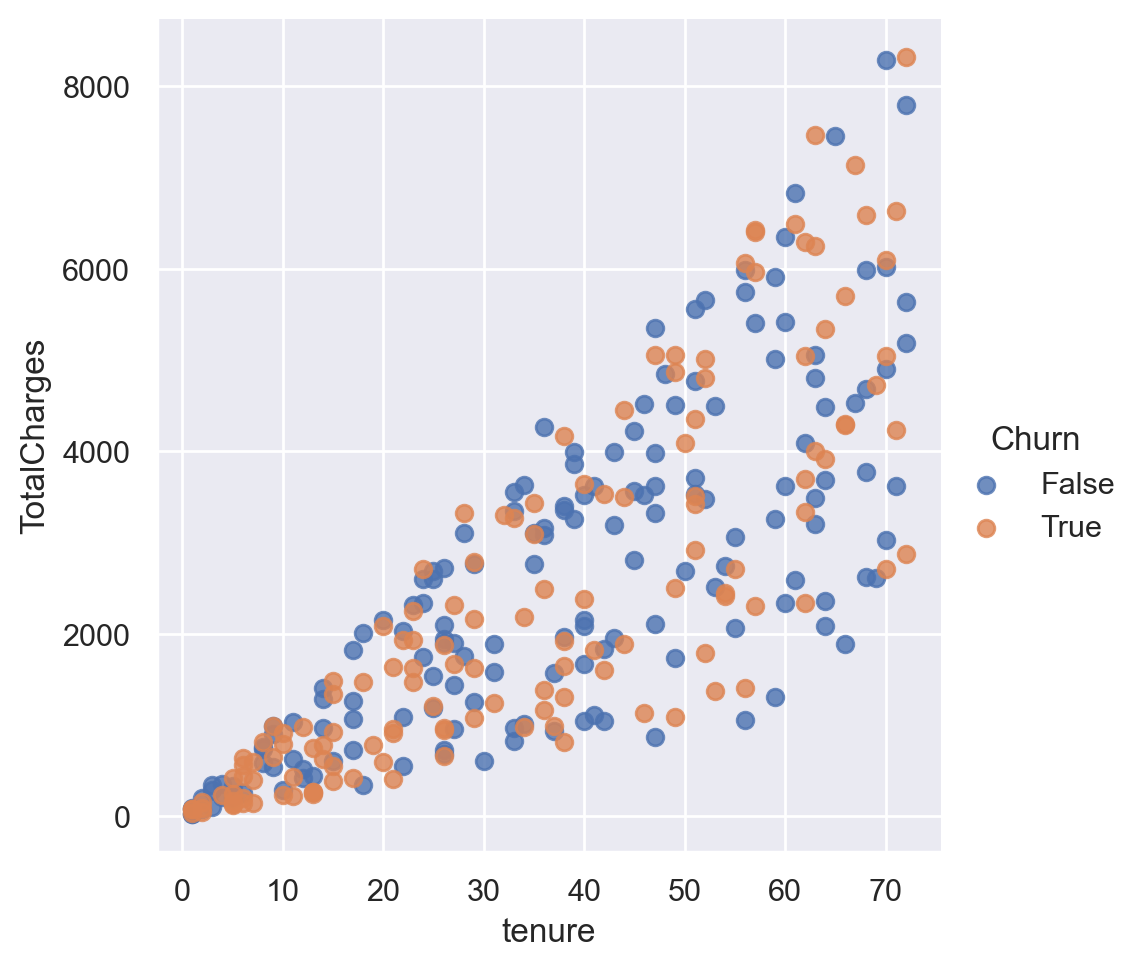

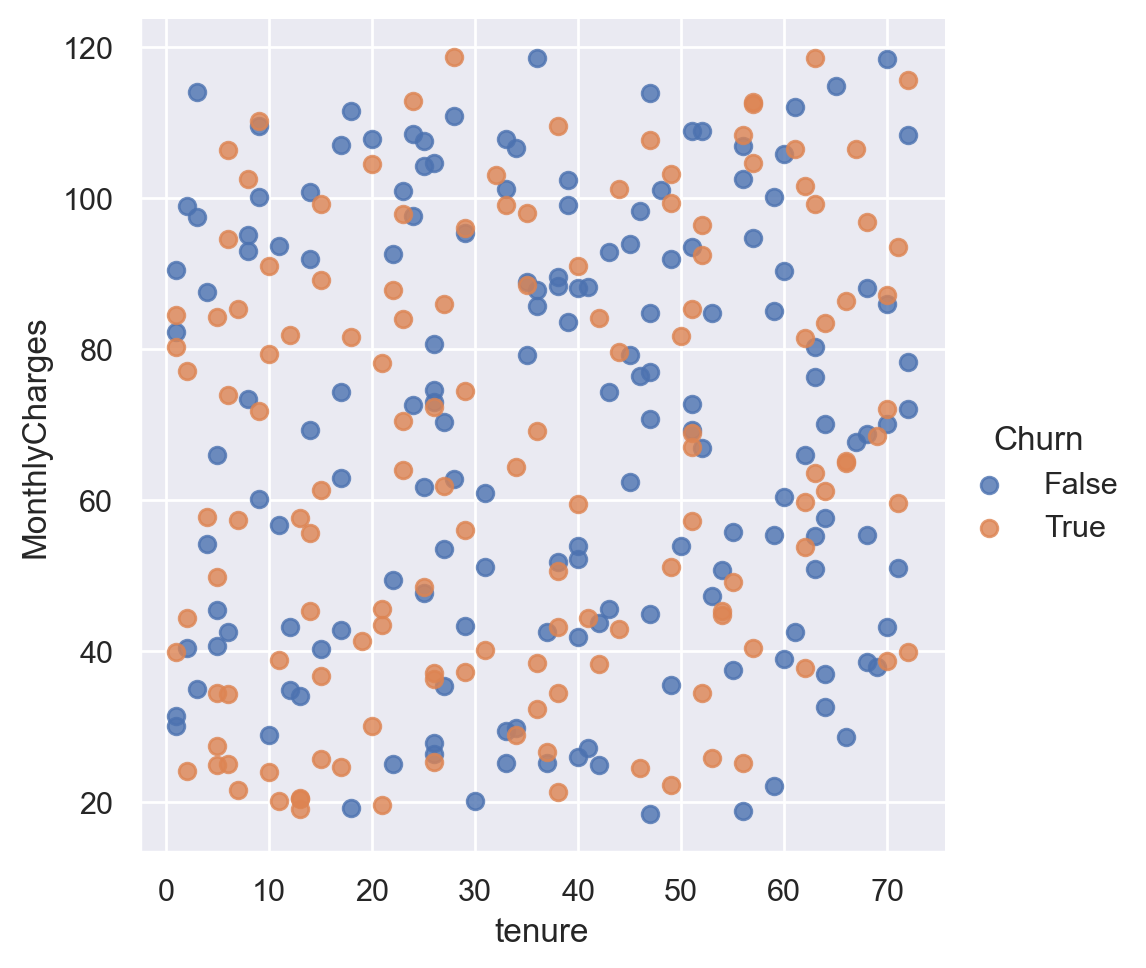

In [38]:
sns.lmplot(data = df, x= 'tenure', y = 'TotalCharges',hue = 'Churn', fit_reg =False)
sns.lmplot(data = df, x= 'tenure', y = 'MonthlyCharges',hue = 'Churn', fit_reg =False)

### 4.3- Visualsation des relations entre variables qualitatives

### Tableau de contingence

Visualisons les relations entre les variables non numériques et la varibles Churn

In [39]:
Tenure_Churn = pd.crosstab(df['tenure'], df['Churn']).T
Tenure_Churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,
False,4,2,3,2,3,1,0,3,3,1,...,4,4,1,1,1,4,1,4,1,3
True,3,3,0,1,5,5,3,1,2,3,...,3,2,0,3,1,1,1,3,2,2


In [40]:
MonthlyCharges_Churn = pd.crosstab(df['MonthlyCharges'], df['Churn']).T
MonthlyCharges_Churn

MonthlyCharges,18.45,18.78,19.09,19.25,19.63,20.07,20.17,20.45,20.50,21.38,...,112.63,112.83,113.87,114.01,114.72,115.54,118.36,118.47,118.51,118.64
Churn,,,,,,,,,,,,,,,,,,,,,
False,1,1,0,1,0,1,0,0,0,0,...,0,0,1,1,1,0,1,1,0,0
True,0,0,1,0,1,0,1,1,1,1,...,1,1,0,0,0,1,0,0,1,1


In [41]:
TotalCharges_Churn = pd.crosstab(df['TotalCharges'], df['Churn']).T
TotalCharges_Churn

TotalCharges,30.03,31.32,39.80,48.10,80.24,80.64,82.21,84.53,88.68,90.48,...,6492.84,6585.12,6634.24,6831.39,7130.14,7456.80,7466.13,7795.44,8285.20,8318.88
Churn,,,,,,,,,,,,,,,,,,,,,
False,1,1,0,0,0,1,1,0,0,1,...,0,0,0,1,0,1,0,1,1,0
True,0,0,1,1,1,0,0,1,1,0,...,1,1,1,0,1,0,1,0,0,1


## Data Pre-processing

In [42]:
df1 = df.copy()

In [43]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,True
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,True
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,True
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,False
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,True


### Création de sous ensembles

In [44]:
missing_rate = df1.isna().sum()/df.shape[0]

In [45]:
services_columns = list(df1.columns[(missing_rate< 0.9) & (missing_rate >0.88)])
valuable_columns = list(df1.columns[(missing_rate< 0.88) & (missing_rate >0.75)])

In [46]:
Key_columns = ['tenure','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
               'Churn']

In [47]:
df1 = df[Key_columns + services_columns + valuable_columns]
df1.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5,No,Yes,No,No,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,True
1,42,Yes,No phone service,DSL,Yes,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,True
2,61,Yes,No phone service,No,No,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,True
3,22,Yes,No,No,No internet service,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,False
4,21,No,No,DSL,No,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,True


### TrainTest - Nettoyage - Encodage

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
trainset, testset = train_test_split(df1, test_size = 0.2, random_state = 0)

In [50]:
trainset['Churn'].value_counts()

Churn
False    128
True     112
Name: count, dtype: int64

In [51]:
testset['Churn'].value_counts()

Churn
False    33
True     27
Name: count, dtype: int64

### Encodage

In [52]:
for col in df1.select_dtypes('object') :
    print(f'{col :-<50} {df[col].unique()}')

PhoneService-------------------------------------- ['No' 'Yes']
MultipleLines------------------------------------- ['Yes' 'No phone service' 'No']
InternetService----------------------------------- ['No' 'DSL' 'Fiber optic']
OnlineSecurity------------------------------------ ['No' 'Yes' 'No internet service']
DeviceProtection---------------------------------- ['No' 'Yes' 'No internet service']
TechSupport--------------------------------------- ['No' 'Yes' 'No internet service']
StreamingTV--------------------------------------- ['No' 'No internet service' 'Yes']
StreamingMovies----------------------------------- ['No internet service' 'No' 'Yes']
Contract------------------------------------------ ['Month-to-month' 'Two year' 'One year']
PaperlessBilling---------------------------------- ['Yes' 'No']
PaymentMethod------------------------------------- ['Credit card' 'Electronic check' 'Bank transfer' 'Mailed check']


In [53]:
code = { 'No' : 0,
        'Yes' : 1,
        'No phone service':2,
        'No internet service':2,
        'DSL':2,
        'Fiber optic':1,
        'Month-to-month' : 1,
        'Two year':2,
        'One year':3,
        'Credit card':1,
        'Electronic check':2,
        'Bank transfer':3,
        'Mailed check':4}


In [54]:
for col in df1.select_dtypes('object'):
    df1[col] = df1[col].map(code)

In [55]:
df1.head(10)

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5,0,1,0,0,0,0,0,2,1,1,1,27.43,137.15,True
1,42,1,2,2,1,0,0,2,2,2,0,2,38.28,1607.76,True
2,61,1,2,0,0,0,1,1,0,3,0,3,106.44,6492.84,True
3,22,1,0,0,2,1,0,2,1,1,0,2,92.49,2034.78,False
4,21,0,0,2,0,2,0,0,2,3,0,3,19.63,412.23,True
5,70,1,2,0,2,1,2,2,1,1,1,2,43.21,3024.70,False
6,1,0,0,2,0,2,1,2,1,1,0,1,39.80,39.80,True
7,5,0,1,0,0,2,1,0,2,1,0,1,45.47,227.35,False
8,12,0,1,2,0,2,2,2,2,2,1,3,43.13,517.56,False
9,46,1,0,1,0,2,0,2,1,1,1,2,24.53,1128.38,True


In [57]:
df1.dtypes.value_counts()

int64      12
float64     2
bool        1
Name: count, dtype: int64

In [59]:
def encodage(df1) :
    code = { 'No' : 0,
                'Yes' : 1,
                'No phone service':2,
                'No internet service':2,
                'DSL':2,
                'Fiber optic':1,
                'Month-to-month' : 1,
                'Two year':2,
                'One year':3,
                'Credit card':1,
                'Electronic check':2,
                'Bank transfer':3,
                'Mailed check':4}


    for col in df1.select_dtypes('object'):
        df1[col] = df1[col].map(code)
    return df1

In [61]:
def imputation(df1):
    return df1.dropna(axis=0)

In [64]:
def preprocessing(df1):
    
    df1 = encodage(df1)
    df1 = imputation(df1)

    x = df1.drop('Churn', axis=1)
    y = df1['Churn']
    print(y.value_counts())
    return x, y

In [65]:
x_train, y_train = preprocessing(trainset)

Churn
False    128
True     112
Name: count, dtype: int64


In [66]:
x_test, y_test = preprocessing(testset)

Churn
False    33
True     27
Name: count, dtype: int64


### Machine Learning : Création du modèle 

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model = DecisionTreeClassifier(random_state = 0)

### Procédure d'évaluation 

In [69]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [74]:
def evalution(model):

    model.fit(x_train, y_train)
    ypred = model.predict(x_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

    N, train_score, val_score = learning_curve(model, x_train, y_train, cv=4, scoring = 'f1', train_sizes=np.linspace(0.1, 1, 10))


    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label = 'train_score')
    plt.plot(N, val_score.mean(axis=1), label = 'train_score')
    plt.legend()

[[22 11]
 [14 13]]
              precision    recall  f1-score   support

       False       0.61      0.67      0.64        33
        True       0.54      0.48      0.51        27

    accuracy                           0.58        60
   macro avg       0.58      0.57      0.57        60
weighted avg       0.58      0.58      0.58        60



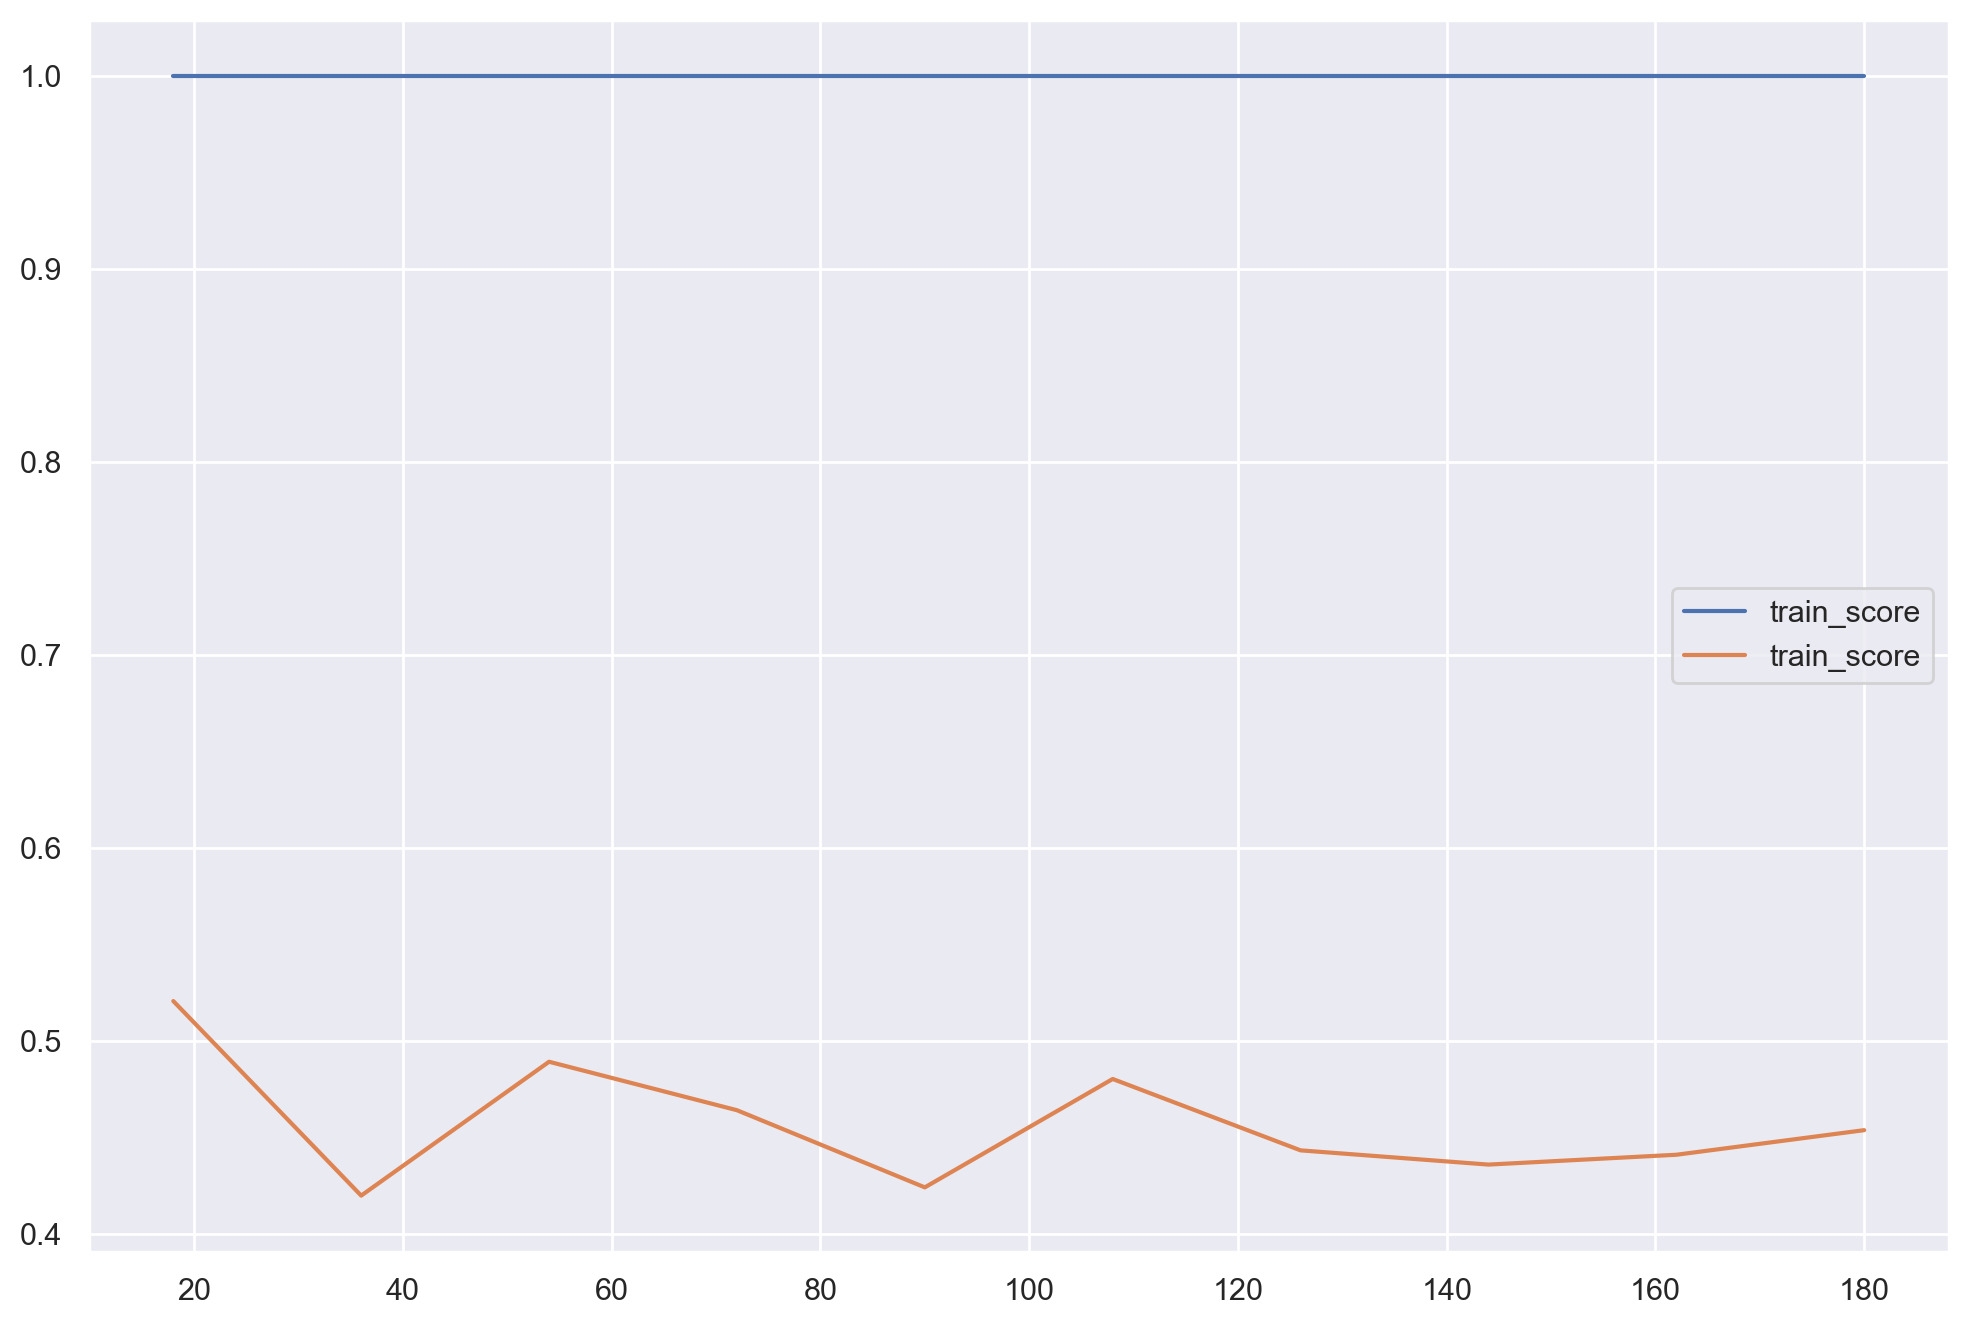

In [75]:
evalution(model)

### _______________________________________________________S'arrêter ici___________________________________________________

In [77]:
________________________________________________________________________________________________________________________________

NameError: name '________________________________________________________________________________________________________________________________' is not defined

### Recodage des variables en vue de l'apprentissage du modèle de prédiction de Churn

In [ ]:
df['gender']= df['gender'].apply(lambda x: 0 if x== 'Female' else 1)

In [ ]:
df['Partner']= df['Partner'].apply(lambda x: 0 if x== 'No' else 1)

In [ ]:
df['Dependents']= df['Dependents'].apply(lambda x: 0 if x== 'No' else 1)

In [ ]:
df['PhoneService']= df['PhoneService'].apply(lambda x: 0 if x== 'No' else 1)

In [ ]:
df['MultipleLines']= df['MultipleLines'].apply(lambda x: 1 if x== 'No'  else 0)

In [ ]:
df['InternetService']= df['InternetService'].apply(lambda x: 1 if x== 'Fiber optic' else (2 if x=='DSL' else 0))

In [ ]:
df['OnlineSecurity']= df['OnlineSecurity'].apply(lambda x: 1 if x== 'Yes' else (2 if x=='No' else 0))

In [ ]:
df['OnlineBackup']= df['OnlineBackup'].apply(lambda x: 1 if x== 'Yes' else (2 if x=='No' else 0))

In [ ]:
df['DeviceProtection']= df['DeviceProtection'].apply(lambda x: 1 if x== 'Yes' else (2 if x=='No' else 0))

In [ ]:
df['TechSupport']= df['TechSupport'].apply(lambda x: 1 if x== 'Yes' else (2 if x=='No' else 0))

In [ ]:
df['TechSupport']= df['TechSupport'].apply(lambda x: 1 if x== 'Yes' else (2 if x=='No' else 0))

In [ ]:
df['StreamingTV']= df['StreamingTV'].apply(lambda x: 1 if x== 'Yes' else (2 if x=='No' else 0))

In [ ]:
df['StreamingMovies']= df['StreamingMovies'].apply(lambda x: 1 if x== 'Yes' else (2 if x=='No' else 0))

In [ ]:
df['Contract']= df['Contract'].apply(lambda x: 1 if x== 'Month-to-month' else (2 if x=='One year' else 0))

In [ ]:
df['Contract']= df['Contract'].apply(lambda x: 1 if x== 'Month-to-month' else (2 if x=='One year' else 0))

In [ ]:
df['PaperlessBilling']= df['PaperlessBilling'].apply(lambda x: 1 if x== 'Yes' else 0)

In [ ]:
mapping = {'Electronic check':1, 'Bank transfer':2, 'Credit card':3, 'Mailed check' : 4}
df['PaymentMethod']= df['PaymentMethod'].map(mapping)

In [ ]:
df['PaymentMethod'].value_counts()

# Machine Learning - Prédiction du Churn

In [ ]:
sns.set(color_codes=True)
%matplotlib inline

In [ ]:
#Regardons en bref à quoi ressemble notre dataset
df.head(3)

In [ ]:
#Suppression de la colonne CustumerID

df = df.drop('customerID', axis = 1)
df.head()

In [ ]:
#En guise de rappel regardons à quoi ressemble notre datset et ses variables
print(df.shape)

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
df.info()

## Application des modèles de classification 

In [ ]:
#Métriques pour évaluer la performance des modèles
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Isolation des Features
X = df.iloc[: , :-1].values

#Isolation du target
Y = df.iloc[:, -1].values

#Séparation des données en échantions d'apprentissages et de test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

In [ ]:
Y_train

In [ ]:
#Taille de l'échantillon d'apprentissage
print('Feature >>', 'X_train :', len(X_train), '|', 'Target >>', 'Y_train :', len(Y_train))

In [ ]:
#Taille de l'échantillon de test
print('Feature >>', 'X_test :', len(X_test), '|', 'Target >>', 'Y_test :', len(Y_test))

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#Instancier l'algorithme
classifieur = LogisticRegression()

#Apprentissage du modèle à partir de l'échantillon d'apprentissage ou train
classifieur.fit(X_train, Y_train)

#Prédiction des target à partir des Features de l'échantion test
Y_pred = classifieur.predict(X_test)

### Evaluation des performances du modèle

In [ ]:
#Rapport de classification
print(classification_report(Y_test, Y_pred))

In [ ]:
#Matrice de confusion
print(confusion_matrix(Y_test, Y_pred))

In [ ]:
#Score de précision
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, Y_pred)
score = score*100
print('Precision :', score, '%')